In [2]:
import os
import scanpy as sc
import spatialdata as sd
import matplotlib.pyplot as plt

In [1]:
%pip install spatialdata

     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ------------- -------------------------- 0.5/1.4 MB 15.2 MB/s eta 0:00:01
     ------------------------------------ --- 1.3/1.4 MB 13.9 MB/s eta 0:00:01
     ---------------------------------------- 1.4/1.4 MB 15.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
     -- ------------------------------------- 0.9/14.6 MB 18.1 MB/s eta 0:00:01
     ---- ----------------------------------- 1.5/14.6 MB 15.8 MB/s eta 0:00:01
     ----- ---------------------------------- 2.1/14.6 MB 17.0 MB/s eta 0:00:01
     ------- -------------------------------- 2.9/14.6 MB 16.8 MB/s eta 0:00:01
     ---------- ----------------------------- 3.7/14.6 MB 17.1 MB/s eta 0:00:01
     ------------ --------------------------- 4.5/14.6 MB 16.9 MB/s eta 0:00:01
     -------------- ------------------------- 5.3/14.6 MB 16.9 MB/s eta 0:00:01
     ---------------- ----------------------- 6.0/14.6 MB 16

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
vitessce 3.1.1 requires anndata<0.9,>=0.7.8, but you have anndata 0.10.2 which is incompatible.
vitessce 3.1.1 requires ome-zarr==0.2.1, but you have ome-zarr 0.8.2 which is incompatible.


In [6]:
toy_folder_path = 'C:/Users/darkr/Projects/vitessce-python/demos/toy/data/processed'
zarr_files = [os.path.join(toy_folder_path, f) for f in os.listdir(toy_folder_path) if f.endswith('.zarr')]
print(f"Found {len(zarr_files)} zarr files in the 'toy' directory.")


Found 3 zarr files in the 'toy' directory.


In [19]:
def process_and_plot_zarr(zarr_path):
    # Read zarr file
    sdata = sd.read_zarr(zarr_path)
    adata = sdata.table

    sc.pp.normalize_total(adata, target_sum=1e6, inplace=True)\
    
        
    zarr_basename = os.path.splitext(os.path.basename(zarr_path))[0]

    # Initial heatmap before normalization
    sc.pl.heatmap(adata, var_names=adata.var_names, groupby='fov', use_raw=False, show=False, save=f"heatmap_before_{zarr_basename}.png")

    
    # Normalize
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)

    
    # Heatmap after normalization
    sc.pl.heatmap(adata, var_names=adata.var_names, groupby='fov', use_raw=False, show=False, save=f"heatmap_before_{zarr_path}.png")


    print(f"Processed {zarr_path}.")


c:\Users\darkr\Projects\vitessce-python\.venv\Lib\site-packages\spatialdata\models\models.py:466: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(data[feature_key]):
c:\Users\darkr\Projects\vitessce-python\.venv\Lib\site-packages\scanpy\preprocessing\_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


c:\Users\darkr\Projects\vitessce-python\.venv\Lib\site-packages\scanpy\plotting\_anndata.py:1067: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if isinstance(groupby, str) and is_categorical_dtype(adata.obs[groupby]):


c:\Users\darkr\Projects\vitessce-python\.venv\Lib\site-packages\scanpy\preprocessing\_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


c:\Users\darkr\Projects\vitessce-python\.venv\Lib\site-packages\scanpy\plotting\_anndata.py:1067: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if isinstance(groupby, str) and is_categorical_dtype(adata.obs[groupby]):


OSError: [Errno 22] Invalid argument: 'figures\\heatmapheatmap_before_C:\\Users\\darkr\\Projects\\vitessce-python\\demos\\toy\\data\\processed\\cosmx_io.zarr.png'

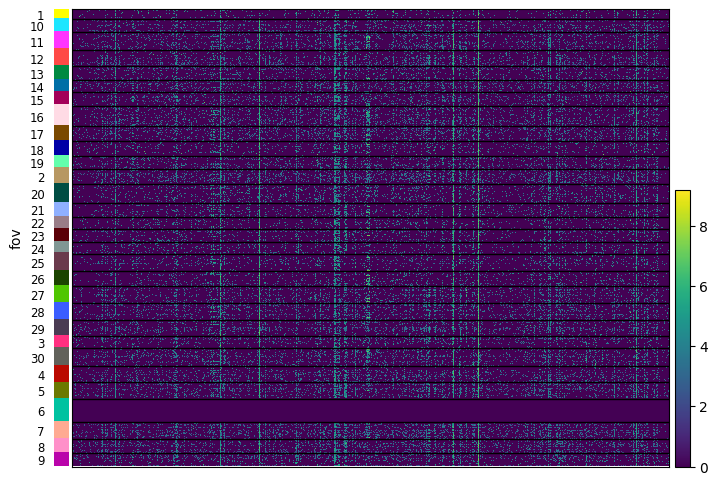

In [20]:
for zarr_file in zarr_files:
    process_and_plot_zarr(zarr_file)